In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


import pandas as pd
import numpy as np

from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix
from sklearn.model_selection import cross_val_score, KFold, cross_validate
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier




In [2]:
genreAll = pd.read_csv("/home/ibroto/Documents/UPF_SMC/ML/Lab1/Lab1/GenreAll.csv")
for col in genreAll.columns:
    genreAll.rename(columns={col:col.strip()}, inplace = True)
feat_30 = pd.read_csv("/home/ibroto/Documents/UPF_SMC/ML/Lab1/Lab1/features_30_sec.csv")
feat_3 = pd.read_csv("/home/ibroto/Documents/UPF_SMC/ML/Lab1/Lab1/features_3_sec.csv")


## Data Overview

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

#scaler = MinMaxScaler()
scaler = preprocessing.StandardScaler()


nrows, ncols = genreAll.shape
print("GenreAll dataset:")
print(f"Nbr of observations: {nrows-1}\nNbr of features: {ncols-2}")
print(f"Nbr of classes: {pd.unique(genreAll.genre).size}")

for col in genreAll.columns:
    if genreAll[col].isna().sum()!=0: print(f"{genreAll[col].isna().sum()} NaN found in col {col}")
    if isinstance(genreAll[col][0], str):
        print(f'  Textual column : {col} (values: {genreAll[col].unique()})')
    else:
        genreAll[col] = scaler.fit_transform(genreAll[[col]])

genreAll.rename(columns={'genre':'label'}, inplace=True) #so that all the datasets have the same solumn name for the label

nrows, ncols = feat_30.shape
print("--------------------------------------------")
print("feature30 dataset:")
print(f"Nbr of observations: {nrows-1}\nNbr of features: {ncols-3}")
print(f"Nbr of classes: {pd.unique(feat_30.label).size}")

for col in feat_30.columns[1:]:
    if isinstance(feat_30[col][0], str): print(f'  Textual column : {col} (values: {feat_30[col].unique()})')
    else:
        feat_30[col] = scaler.fit_transform(feat_30[[col]])

        #feat_30[col] = (feat_30[col]-feat_30[col].min())/(feat_30[col].max()-feat_30[col].min())


nrows, ncols = feat_3.shape
print("--------------------------------------------")
print("feature3 dataset:")
print(f"Nbr of observations: {nrows-1}\nNbr of features: {ncols-3}")
print(f"Nbr of classes: {pd.unique(feat_3.label).size}")
for col in feat_3.columns[1:]:
    if isinstance(feat_3[col][0], str): print(f'  Textual column : {col} (values: {feat_3[col].unique()})')
    else:
        feat_3[col] = scaler.fit_transform(feat_3[[col]])

        #feat_3[col] = (feat_3[col]-feat_3[col].min())/(feat_3[col].max()-feat_3[col].min())



GenreAll dataset:
Nbr of observations: 992
Nbr of features: 239
Nbr of classes: 10
  Textual column : highlevel_speech_music_value (values: ['speech' 'music'])
  Textual column : highlevel_voice_instrumental_value (values: ['instrumental' 'voice'])
  Textual column : tonal_key_mode_value (values: ['major' 'minor'])
  Textual column : genre (values: ['blu' 'cla' 'cou' 'dis' 'hip' 'jaz' 'met' 'pop' 'reg' 'roc'])
--------------------------------------------
feature30 dataset:
Nbr of observations: 999
Nbr of features: 57
Nbr of classes: 10
  Textual column : label (values: ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock'])
--------------------------------------------
feature3 dataset:
Nbr of observations: 9989
Nbr of features: 57
Nbr of classes: 10
  Textual column : label (values: ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock'])


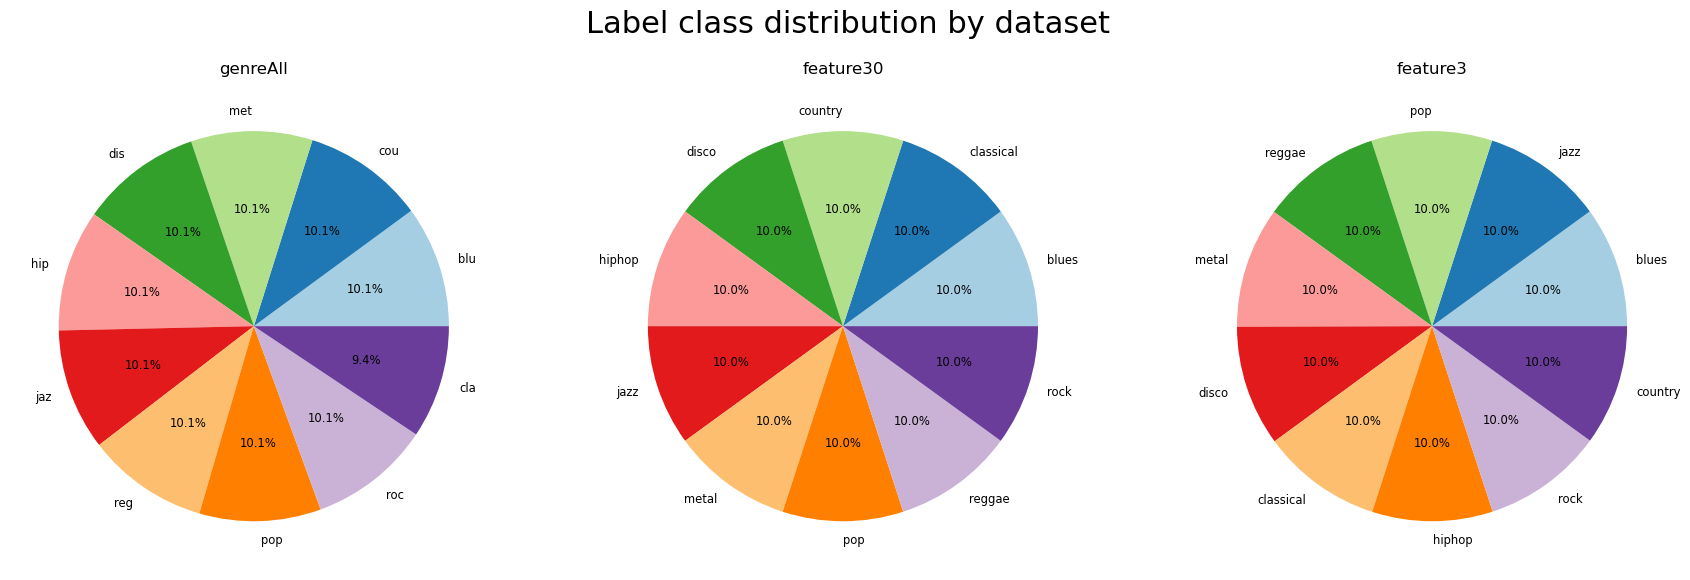

In [4]:
import matplotlib.pyplot as plt

# Example: replace these with your actual DataFrames
datasets = {
    'genreAll': genreAll,
    'feature30': feat_30,
    'feature3': feat_3
    }

fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # smaller width makes pies larger

colors = plt.cm.Paired.colors

for ax, (name, df) in zip(axes, datasets.items()):
    count_df = df['label'].value_counts().reset_index()
    count_df.columns = ['values', 'counts']

    ax.pie(count_df['counts'], labels=count_df['values'], autopct='%.1f%%',
           textprops={'size': 'smaller'}, radius=1,
           colors=colors[:len(count_df)])
    ax.set_title(f'{name}')

fig.suptitle('Label class distribution by dataset', fontsize=22)

plt.tight_layout(pad=2.0)
plt.show()


In [5]:

#replace string-valued rows with integers
genre_dict = {'blu':0, 'cla':1, 'cou':2, 'dis':3, 'hip':4, 'jaz':5, 'met':6, 'pop':7, 'reg':8,'roc':9}
highlevel_speech_music_value_dict = {'music':0, 'speech':1}
highlevel_voice_instrumental_value_dict = {'instrumental':0, 'voice':1}
tonal_key_mode_value_dict = {'minor':0, 'major':1}

genreAll['highlevel_speech_music_value'] = genreAll['highlevel_speech_music_value'].replace(highlevel_speech_music_value_dict)
genreAll['highlevel_voice_instrumental_value'] = genreAll['highlevel_voice_instrumental_value'].replace(highlevel_voice_instrumental_value_dict)
genreAll['tonal_key_mode_value'] = genreAll['tonal_key_mode_value'].replace(tonal_key_mode_value_dict)
genreAll['label'] = genreAll['label'].replace(genre_dict)

feat_label_dict = {'blues':0, 'classical':1, 'country':2, 'disco':3, 'hiphop':4, 'jazz':5, 'metal':6, 'pop':7, 'reggae':8,'rock':9}
feat_30['label'] = feat_30['label'].replace(feat_label_dict)

feat_label_dict = {'blues':0, 'classical':1, 'country':2, 'disco':3, 'hiphop':4, 'jazz':5, 'metal':6, 'pop':7, 'reggae':8,'rock':9}
feat_3['label'] = feat_3['label'].replace(feat_label_dict)

## Feature Selection

We have a lot of features. As a rule od thumb, we want to have ten times more data than number of features, which means that at most we would like to have around 100 features. Let's start with that, and later we can play around with this number

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

featSelector = SelectKBest(f_classif, k=60)
reduced_allGenre = featSelector.fit_transform(genreAll[genreAll.columns[2:-1]],genreAll[genreAll.columns[-1]])
reduced_allGenre = np.concatenate((reduced_allGenre, genreAll[genreAll.columns[-1]].values.reshape(-1, 1)), axis=1)


/home/ibroto/anaconda3/envs/MLcourse_upf_smc/lib/python3.13/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [96 98] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/ibroto/anaconda3/envs/MLcourse_upf_smc/lib/python3.13/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


## Train-test splits

In [7]:
from sklearn.model_selection import train_test_split
data = {
    'genreAll':{'X_train':[],'y_train':[],'X_test':[],'y_test':[]},
    'feat_30':{'X_train':[],'y_train':[],'X_test':[],'y_test':[]},
    'feat_3':{'X_train':[],'y_train':[],'X_test':[],'y_test':[]},
}


data['genreAll']['X_train'], data['genreAll']['X_test'], data['genreAll']['y_train'], data['genreAll']['y_test'] = train_test_split(reduced_allGenre[:,:-1], reduced_allGenre[:,-1], test_size=0.20)
data['feat_30']['X_train'], data['feat_30']['X_test'], data['feat_30']['y_train'], data['feat_30']['y_test'] = train_test_split(feat_30[feat_30.columns[:-1]], feat_30.label, test_size=0.20)

# Note that features_3.csv contains multiple fragments of the same song
# Fragments of the same song shouldn't be at the same time in the train and test splits
train_filenames = data['feat_30']['X_train'].filename.unique()
test_filenames = data['feat_30']['X_test'].filename.unique()
#now we can get rid of them in the feat30 data
data['feat_30']['X_train'] = data['feat_30']['X_train'][data['feat_30']['X_train'].columns[2:]]
data['feat_30']['X_test'] = data['feat_30']['X_test'][data['feat_30']['X_test'].columns[2:]]

feat_3['original_filename'] = feat_3['filename'].transform(lambda x: x.split('.')[0]+'.'+x.split('.')[1]+'.wav')

data['feat_3']['X_train'] =feat_3[feat_3['original_filename'].isin(train_filenames)][feat_3.columns[2:-2]]
data['feat_3']['y_train'] =feat_3[feat_3['original_filename'].isin(train_filenames)][feat_3.columns[-2]]
data['feat_3']['X_test'] = feat_3[feat_3['original_filename'].isin(test_filenames)][feat_3.columns[2:-2]]
data['feat_3']['y_test'] = feat_3[feat_3['original_filename'].isin(test_filenames)][feat_3.columns[-2]]

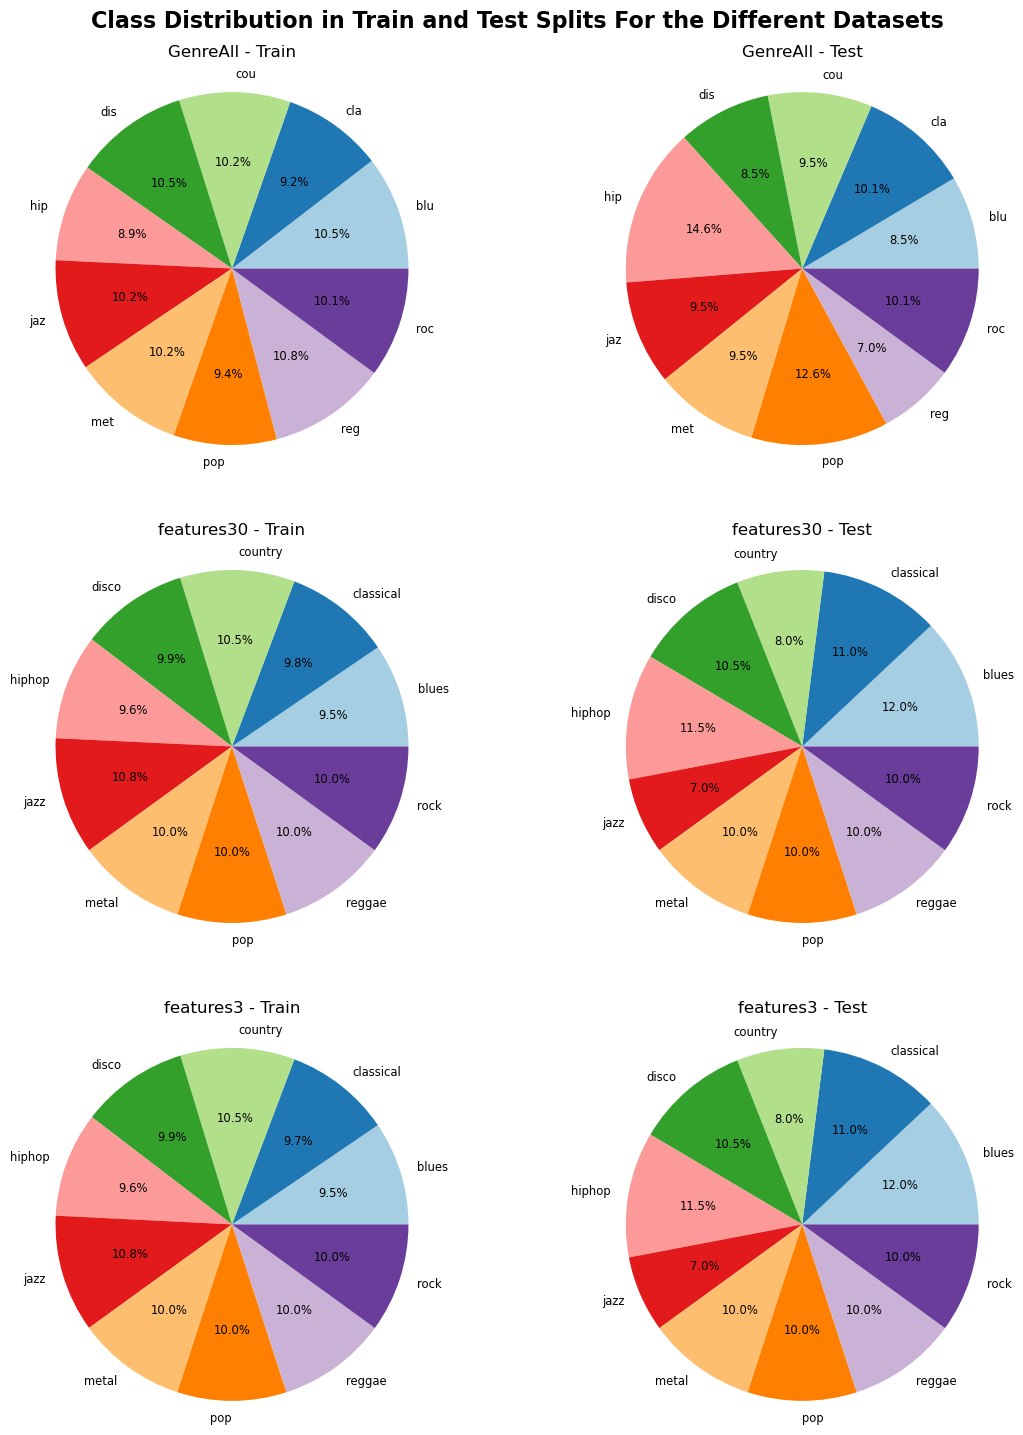

In [8]:
import matplotlib.pyplot as plt

# Invert tag dictionary (int -> string)
inv_genre_dic = {v: k for k, v in genre_dict.items()}
# Invert tag dictionary (int -> string)
inv_feat_label_dict = {v: k for k, v in feat_label_dict.items()}


# Count occurrences from np.array
unique_train, genreAll_train_counts = np.unique(data['genreAll']['y_train'], return_counts=True)
unique_test, genreAll_test_counts = np.unique(data['genreAll']['y_test'], return_counts=True)
# Convert to label names using the inverted map
genreAll_train_labels = [inv_genre_dic[i] for i in unique_train]
genreAll_test_labels = [inv_genre_dic[i] for i in unique_test]

# Count occurrences from pandas
feat30_train_counts = data['feat_30']['y_train'].value_counts().sort_index()
feat30_test_counts = data['feat_30']['y_test'].value_counts().sort_index()
# Convert to label names using the inverted map
feat30_train_labels = [inv_feat_label_dict[i] for i in feat30_train_counts.index]
feat30_test_labels = [inv_feat_label_dict[i] for i in feat30_test_counts.index]

# Count occurrences from pandas
feat3_train_counts = data['feat_3']['y_train'].value_counts().sort_index()
feat3_test_counts = data['feat_3']['y_test'].value_counts().sort_index()
# Convert to label names using the inverted map
feat3_train_labels = [inv_feat_label_dict[i] for i in feat3_train_counts.index]
feat3_test_labels = [inv_feat_label_dict[i] for i in feat3_test_counts.index]

datasets = [
    ("GenreAll", genreAll_train_counts, genreAll_test_counts, genreAll_train_labels, genreAll_test_labels),
    ("features30", feat30_train_counts, feat30_test_counts, feat30_train_labels, feat30_test_labels),
    ("features3", feat3_train_counts, feat3_test_counts, feat3_train_labels, feat3_test_labels)
]

colors = plt.cm.Paired.colors

fig, axes = plt.subplots(3, 2, figsize=(12, 15))  # 3 rows × 2 columns

for i, (name, train_counts, test_counts, train_labels, test_labels) in enumerate(datasets):
    # --- Train pie (left column) ---
    axes[i, 0].pie(
        train_counts,
        autopct='%1.1f%%',
        labels=train_labels,
        colors=colors[:len(train_labels)],
        radius=1.2,
        textprops={'size': 'smaller'}
    )
    axes[i, 0].set_title(f'{name} - Train',pad=20)

    # --- Test pie (right column) ---
    axes[i, 1].pie(
        test_counts,
        autopct='%1.1f%%',
        labels=test_labels,
        colors=colors[:len(test_labels)],
        radius=1.2,
        textprops={'size': 'smaller'}
    )
    axes[i, 1].set_title(f'{name} - Test',pad=20)

# Global title and layout tweaks
fig.suptitle('Class Distribution in Train and Test Splits For the Different Datasets', fontsize=16, fontweight='bold')
plt.tight_layout(pad=4.0)
plt.subplots_adjust(hspace=0.3, top=0.93)
plt.show()


## Logistic Regression

Lets first start with the simplest method, a logistic regresion, and see how it performs in a confussion matrix

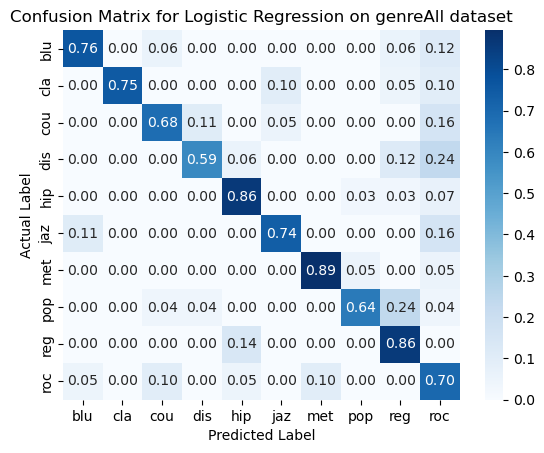

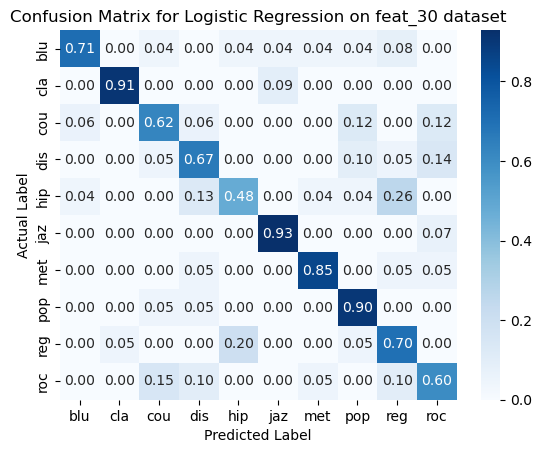

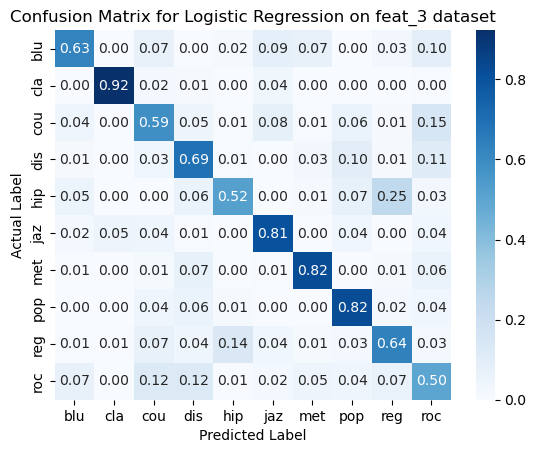

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

X_train = data['feat_30']['X_train']
y_train = data['feat_30']['y_train']
X_test = data['feat_30']['X_test']
y_test = data['feat_30']['y_test']

for dataset_name in data.keys():
    X_train = data[dataset_name]['X_train']
    y_train = data[dataset_name]['y_train']
    X_test = data[dataset_name]['X_test']
    y_test = data[dataset_name]['y_test']
    
    clf = LogisticRegression(random_state=0, max_iter=500).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    clf.score(X_test, y_test)

    label_names = [i for i in genre_dict.keys()]
    singleClass_cm = multilabel_confusion_matrix(y_test, y_pred,
                                labels=genreAll.label.unique()) #tn, fn, fp, tp

    cm = confusion_matrix(y_test, y_pred,
                                labels=genreAll.label.unique(), normalize='true') #tn, fn, fp, tp
    df_cfm = pd.DataFrame(cm, index=label_names, columns=label_names)
    cfm_plot = sn.heatmap(df_cfm,annot=df_cfm,fmt=".2f",cmap="Blues")
    plt.title(f'Confusion Matrix for Logistic Regression on {dataset_name} dataset')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()



## k-Nearest Neigbours

We will now try with the k-nn method, and find which k is the one that leads to best validation accuracy. We'll store the best k value for each dataset

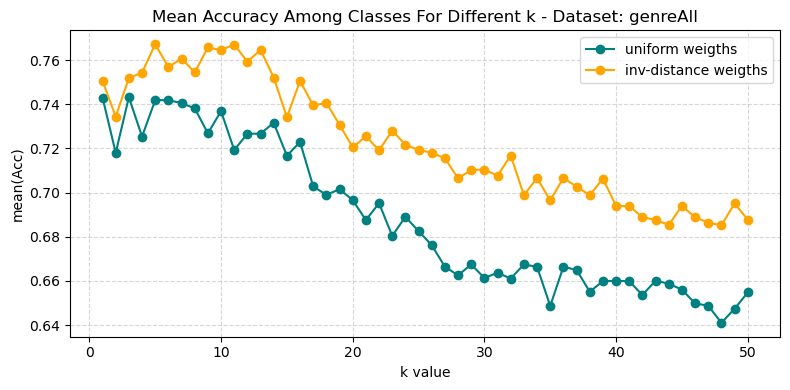

Best AccScore for uniformly weigthed distances: 0.7431 ± 0.0542 (k = 3)
Best AccScore for inv-dist weigthed distances: 0.7672 ± 0.0394 (k = 5)


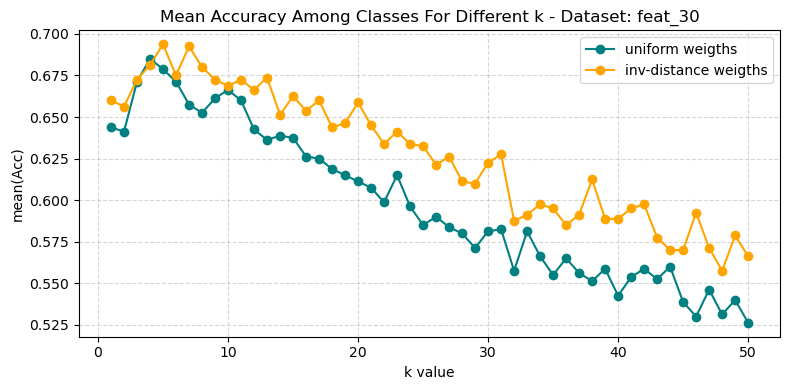

Best AccScore for uniformly weigthed distances: 0.6850 ± 0.0607 (k = 4)
Best AccScore for inv-dist weigthed distances: 0.6938 ± 0.0322 (k = 5)


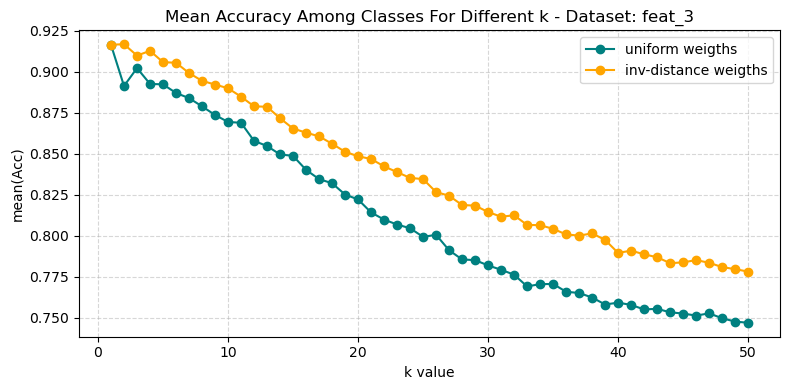

Best AccScore for uniformly weigthed distances: 0.9163 ± 0.0080 (k = 1)
Best AccScore for inv-dist weigthed distances: 0.9166 ± 0.0053 (k = 2)


In [10]:
from sklearn.neighbors import KNeighborsClassifier

kf = KFold(n_splits=10, shuffle=True)


for dataset in data.keys():
    avg_acc_kn = []
    std_acc_kn = []
    avg_acc_kn_dist = []
    std_acc_kn_dist = []
    X_train = data[dataset]['X_train']
    y_train = data[dataset]['y_train']
    X_test = data[dataset]['X_test']
    y_test = data[dataset]['y_test']
    for k in range(1,51,1):
    #uniform distance
        neigh = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(neigh, X_train,y_train, cv=kf)
        avg_acc_kn.append(scores.mean())
        std_acc_kn.append(scores.std())
    #inv-distnace
        neigh = KNeighborsClassifier(n_neighbors=k, weights='distance') #weight points by the inverse of their distance
        scores = cross_val_score(neigh, X_train,y_train, cv=kf)
        avg_acc_kn_dist.append(scores.mean())
        std_acc_kn_dist.append(scores.std())

    plt.figure(figsize=(8, 4))
    plt.plot(range(1,51,1),avg_acc_kn,'o-', color='teal', label='uniform weigths')
    plt.plot(range(1,51,1),avg_acc_kn_dist,'o-', color='orange', label='inv-distance weigths')
    plt.title(f"Mean Accuracy Among Classes For Different k - Dataset: {dataset}")
    plt.xlabel("k value")
    plt.ylabel("mean(Acc)")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()
    data[dataset]['best_k'] = np.argmax(avg_acc_kn)+1 if max(avg_acc_kn)>max(avg_acc_kn_dist) else np.argmax(avg_acc_kn_dist)+1
    print(f"Best AccScore for uniformly weigthed distances: {max(avg_acc_kn):.4f} ± {std_acc_kn[np.argmax(avg_acc_kn)]:.4f} (k = {np.argmax(avg_acc_kn)+1})")
    print(f"Best AccScore for inv-dist weigthed distances: {max(avg_acc_kn_dist):.4f} ± {std_acc_kn_dist[np.argmax(avg_acc_kn)]:.4f} (k = {np.argmax(avg_acc_kn_dist)+1})")



## Decision trees

In [11]:
clf = tree.DecisionTreeClassifier()
kf = KFold(n_splits=10, shuffle=True)

for dataset in data.keys():
    X_train = data[dataset]['X_train']
    y_train = data[dataset]['y_train']
    X_test = data[dataset]['X_test']
    y_test = data[dataset]['y_test']

    clf = tree.DecisionTreeClassifier(criterion='gini')
    scores_gini = cross_val_score(clf, X_train,y_train, cv=kf)
    clf = tree.DecisionTreeClassifier(criterion='entropy')
    scores_entropy = cross_val_score(clf, X_train,y_train, cv=kf)
    clf = tree.DecisionTreeClassifier(criterion='log_loss')
    scores_log_loss = cross_val_score(clf, X_train,y_train, cv=kf)
    print("Dataset:", dataset)
    print(f"Avg AccScore for gini criterion: {scores_gini.mean():.4f} ± {scores_gini.std():.4f}")
    print(f"Avg AccScore for entropy criterion: {scores_entropy.mean():.4f} ± {scores_entropy.std():.4f}")
    print(f"Avg AccScore for log_loss criterion: {scores_log_loss.mean():.4f} ± {scores_log_loss.std():.4f}")
    print('----------------------------------------------------------\n')
    data[dataset]['bestDecTreeCriterion'] = 'gini' if scores_gini.mean() > scores_entropy.mean() and scores_gini.mean() > scores_log_loss.mean() else 'entropy' if scores_entropy.mean() > scores_log_loss.mean() else 'log_loss'




Dataset: genreAll
Avg AccScore for gini criterion: 0.6146 ± 0.0422
Avg AccScore for entropy criterion: 0.5944 ± 0.0544
Avg AccScore for log_loss criterion: 0.6119 ± 0.0663
----------------------------------------------------------

Dataset: feat_30
Avg AccScore for gini criterion: 0.5012 ± 0.0717
Avg AccScore for entropy criterion: 0.5150 ± 0.0619
Avg AccScore for log_loss criterion: 0.4925 ± 0.0332
----------------------------------------------------------

Dataset: feat_3
Avg AccScore for gini criterion: 0.6599 ± 0.0120
Avg AccScore for entropy criterion: 0.6811 ± 0.0095
Avg AccScore for log_loss criterion: 0.6815 ± 0.0140
----------------------------------------------------------



## Random Forest

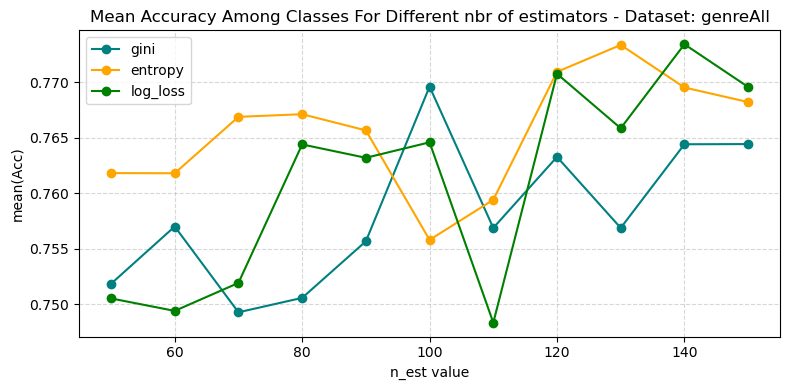

Dataset: genreAll
Best AccScore for gini criterion: 0.7696 ± 0.0386 (nbr_est = 100)
Best AccScore for entropy criterion: 0.7733 ±0.0519  (nbr_est = 130)
Best AccScore for log_loss criterion: 0.7734 ± 0.0431 (nbr_est = 140)
----------------------------------------------------------



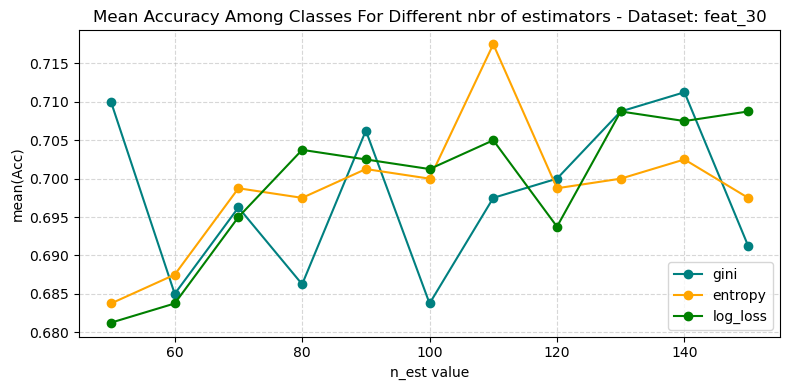

Dataset: feat_30
Best AccScore for gini criterion: 0.7113 ± 0.0431 (nbr_est = 140)
Best AccScore for entropy criterion: 0.7175 ±0.0587  (nbr_est = 110)
Best AccScore for log_loss criterion: 0.7087 ± 0.0657 (nbr_est = 130)
----------------------------------------------------------



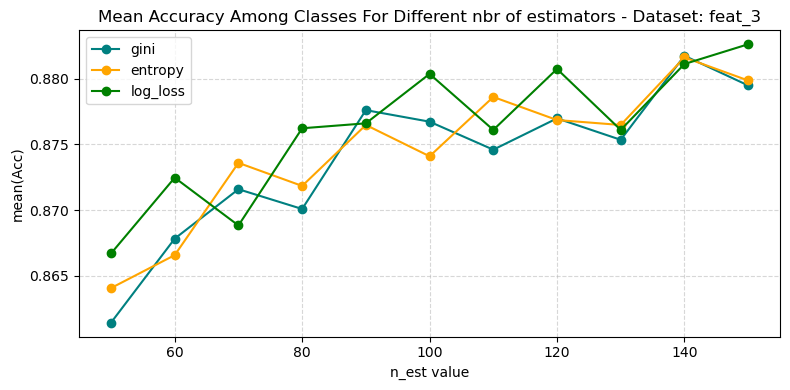

Dataset: feat_3
Best AccScore for gini criterion: 0.8817 ± 0.0141 (nbr_est = 140)
Best AccScore for entropy criterion: 0.8816 ±0.0171  (nbr_est = 140)
Best AccScore for log_loss criterion: 0.8826 ± 0.0092 (nbr_est = 150)
----------------------------------------------------------



In [16]:
kf = KFold(n_splits=10, shuffle=True)

for dataset in data.keys():
    std_acc_gini = []
    avg_acc_gini = []
    std_acc_entropy = []
    avg_acc_entropy = []
    std_acc_log_loss = []
    avg_acc_log_loss = []


    X_train = data[dataset]['X_train']
    y_train = data[dataset]['y_train']
    X_test = data[dataset]['X_test']
    y_test = data[dataset]['y_test']
    for n_est in range(50,151,10):
    #gini:
        clf = RandomForestClassifier(n_estimators=n_est,criterion='gini')
        scores = cross_val_score(clf, X_train,y_train, cv=kf)
        avg_acc_gini.append(scores.mean())
        std_acc_gini.append(scores.std())
    #entropy:
        clf = RandomForestClassifier(n_estimators=n_est,criterion='entropy')
        scores = cross_val_score(clf, X_train,y_train, cv=kf)
        avg_acc_entropy.append(scores.mean())
        std_acc_entropy.append(scores.std())
    #log_loss:
        clf = RandomForestClassifier(n_estimators=n_est,criterion='log_loss')
        scores = cross_val_score(clf, X_train,y_train, cv=kf)
        avg_acc_log_loss.append(scores.mean())
        std_acc_log_loss.append(scores.std())


    plt.figure(figsize=(8, 4))
    plt.plot(range(50,151,10),avg_acc_gini,'o-', color='teal', label='gini')
    plt.plot(range(50,151,10),avg_acc_entropy,'o-', color='orange', label='entropy')
    plt.plot(range(50,151,10),avg_acc_log_loss,'o-', color='green', label='log_loss')

    plt.title(f"Mean Accuracy Among Classes For Different nbr of estimators - Dataset: {dataset}")
    plt.xlabel("n_est value")
    plt.ylabel("mean(Acc)")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()
    #data[dataset]['best_k'] = np.argmax(avg_acc_kn)+1 if max(avg_acc_kn)>max(avg_acc_kn_dist) else np.argmax(avg_acc_kn_dist)+1
    print("Dataset:", dataset)
    print(f"Best AccScore for gini criterion: {max(avg_acc_gini):.4f} ± {std_acc_gini[np.argmax(avg_acc_gini)]:.4f} (nbr_est = {np.argmax(avg_acc_gini)*10+50})")
    print(f"Best AccScore for entropy criterion: {max(avg_acc_entropy):.4f} ±{std_acc_entropy[np.argmax(avg_acc_entropy)]:.4f}  (nbr_est = {np.argmax(avg_acc_entropy)*10+50})")
    print(f"Best AccScore for log_loss criterion: {max(avg_acc_log_loss):.4f} ± {std_acc_log_loss[np.argmax(avg_acc_log_loss)]:.4f} (nbr_est = {np.argmax(avg_acc_log_loss)*10+50})")
    print('----------------------------------------------------------\n')

    data[dataset]['bestRandForest_criterion'] = 'gini' if np.mean(avg_acc_gini) > np.mean(avg_acc_entropy) and np.mean(avg_acc_gini) > np.mean(avg_acc_log_loss) else 'entropy' if np.mean(avg_acc_entropy) > np.mean(avg_acc_log_loss) else 'log_loss'
    data[dataset]['bestNbrEst'] = np.argmax(avg_acc_gini)*10+50 if np.mean(avg_acc_gini) > np.mean(avg_acc_entropy) and np.mean(avg_acc_gini) > np.mean(avg_acc_log_loss) else np.argmax(avg_acc_entropy)*10+50 if np.mean(avg_acc_entropy) > np.mean(avg_acc_log_loss) else np.argmax(avg_acc_log_loss)*10+50



## Multi Layer Perceptron

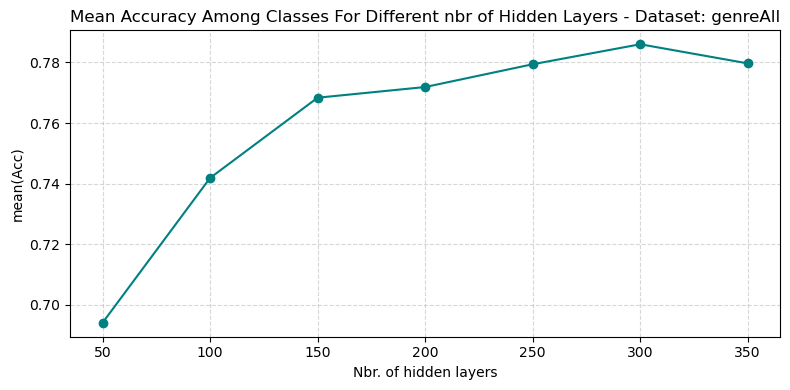

Dataset: genreAll
Best AccScore for MLP: 0.7860 ± 0.0473 (nbr. hidden layers = 300)
----------------------------------------------------------



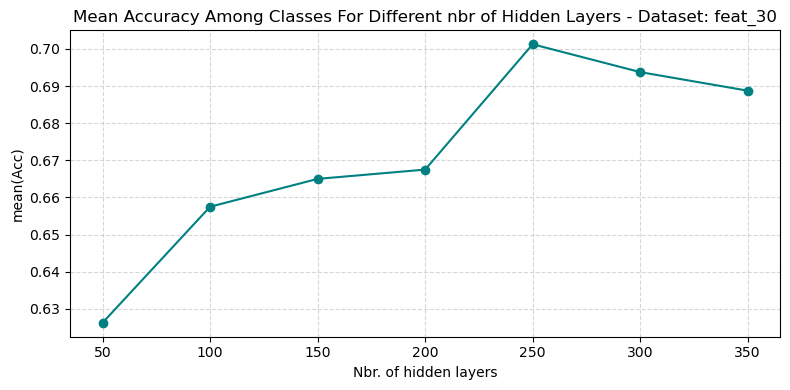

Dataset: feat_30
Best AccScore for MLP: 0.7013 ± 0.0665 (nbr. hidden layers = 250)
----------------------------------------------------------



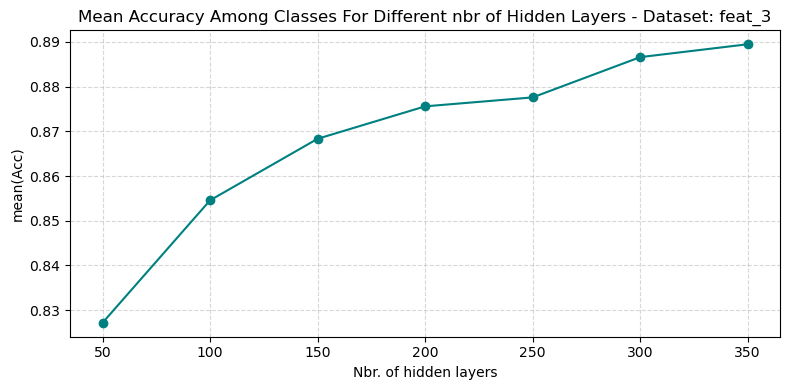

Dataset: feat_3
Best AccScore for MLP: 0.8895 ± 0.0116 (nbr. hidden layers = 350)
----------------------------------------------------------



In [32]:
kf = KFold(n_splits=10, shuffle=True)

for dataset in data.keys():
    std_acc = []
    avg_acc = []

    X_train = data[dataset]['X_train']
    y_train = data[dataset]['y_train']
    X_test = data[dataset]['X_test']
    y_test = data[dataset]['y_test']

    for hidd_layers in range(50,351,50):
        clf = MLPClassifier(hidden_layer_sizes=hidd_layers, max_iter=1000,early_stopping=True)
        scores = cross_val_score(clf, X_train,y_train, cv=kf)
        avg_acc.append(scores.mean())
        std_acc.append(scores.std())


    plt.figure(figsize=(8, 4))
    plt.plot(range(50,351,50),avg_acc,'o-', color='teal')

    plt.title(f"Mean Accuracy Among Classes For Different nbr of Hidden Layers - Dataset: {dataset}")
    plt.xlabel("Nbr. of hidden layers")
    plt.ylabel("mean(Acc)")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
    data[dataset]['best_hid_layers'] = (np.argmax(avg_acc)+1)*50
    print("Dataset:", dataset)
    print(f"Best AccScore for MLP: {max(avg_acc):.4f} ± {std_acc[np.argmax(avg_acc)]:.4f} (nbr. hidden layers = {(np.argmax(avg_acc)+1)*50})")
    print('----------------------------------------------------------\n')

# Fitting all selected models

In [36]:
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score,accuracy_score

scoring = {
    'accuracy': 'accuracy',
    'f1_macro': make_scorer(f1_score, average='macro'),
    'precision_macro': make_scorer(precision_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro')
}

for dataset_name in data.keys():
    data[dataset_name]['models'] = [
        LogisticRegression(random_state=0, max_iter=500),
        KNeighborsClassifier(n_neighbors=data[dataset]['best_k'], weights='distance'), #weight points by the inverse of their distance
        tree.DecisionTreeClassifier(criterion=data[dataset_name]['bestDecTreeCriterion']),
        RandomForestClassifier(random_state=0, criterion=data[dataset_name]['bestRandForest_criterion'], n_estimators=data[dataset_name]['bestNbrEst']),
        MLPClassifier(random_state=1, max_iter=1000,hidden_layer_sizes=data[dataset]['best_hid_layers'],early_stopping=True)
    ]


kf = KFold(n_splits=10, shuffle=True)
avg_acc = []
std_acc = []
models = ['LogisticRegression', 'k-NN', 'Decision Tree', 'Random Forest', 'MLP']

for dataset in data.keys():
    X_train = data[dataset]['X_train']
    y_train = data[dataset]['y_train']
    X_test = data[dataset]['X_test']
    y_test = data[dataset]['y_test']
    data[dataset]['train_scores'] = {
        'stdAcc': [], 'avgAcc': [], 'f1_macro': [], 'precision_macro': [], 'recall_macro': []   
        }
    data[dataset]['test_scores'] = {
        'acc': [], 'f1_macro_test_scores': [], 'precision_macro_test_scores': [], 'recall_macro_test_scores': []    
    }

    classifiers = data[dataset]['models']
    for clf, model in zip(classifiers, models):
        print(clf)
        scores = cross_val_score(clf, X_train,y_train, cv=kf, scoring='accuracy')
        extended_scores = cross_validate(clf, X_train, y_train, cv=10, scoring=scoring, return_train_score=False)

        data[dataset]['train_scores']['avgAcc'].append(scores.mean())
        data[dataset]['train_scores']['stdAcc'].append(scores.std())
        data[dataset]['train_scores']['f1_macro'].append(scores.mean())
        data[dataset]['train_scores']['precision_macro'].append(scores.std())
        data[dataset]['train_scores']['recall_macro'].append(scores.std())

        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        data[dataset]['test_scores']['acc'].append( accuracy_score(y_test, y_pred))
        data[dataset]['test_scores']['f1_macro_test_scores'].append(f1_score(y_test, y_pred, average='macro'))
        data[dataset]['test_scores']['precision_macro_test_scores'].append(precision_score(y_test, y_pred, average='macro'))
        data[dataset]['test_scores']['recall_macro_test_scores'].append(recall_score(y_test, y_pred, average='macro')) 



LogisticRegression(max_iter=500, random_state=0)
KNeighborsClassifier(n_neighbors=np.int64(5), weights='distance')
DecisionTreeClassifier()
RandomForestClassifier(criterion='entropy', n_estimators=np.int64(130),
                       random_state=0)
MLPClassifier(early_stopping=True, hidden_layer_sizes=np.int64(300),
              max_iter=1000, random_state=1)
LogisticRegression(max_iter=500, random_state=0)
KNeighborsClassifier(n_neighbors=np.int64(5), weights='distance')
DecisionTreeClassifier(criterion='entropy')
RandomForestClassifier(criterion='log_loss', n_estimators=np.int64(130),
                       random_state=0)
MLPClassifier(early_stopping=True, hidden_layer_sizes=np.int64(300),
              max_iter=1000, random_state=1)
LogisticRegression(max_iter=500, random_state=0)
KNeighborsClassifier(n_neighbors=np.int64(5), weights='distance')
DecisionTreeClassifier(criterion='log_loss')
RandomForestClassifier(criterion='log_loss', n_estimators=np.int64(150),
                 

In [41]:
train_avg_acc = []
train_std_acc = []
train_f1_macro = []
train_precision_macro = []
train_recall_macro = []
test_acc = []
test_f1_macro = []  
test_prec_macro = []
test_recall_macro = []

# First loop: collect all metrics into lists of arrays
for dataset in data.keys():
    train_avg_acc.append(data[dataset]['train_scores']['avgAcc'])
    train_std_acc.append(data[dataset]['train_scores']['stdAcc'])
    train_f1_macro.append(data[dataset]['train_scores']['f1_macro'])          # FIXED: use append
    train_precision_macro.append(data[dataset]['train_scores']['precision_macro'])  # FIXED
    train_recall_macro.append(data[dataset]['train_scores']['recall_macro'])        # FIXED
    test_acc.append(data[dataset]['test_scores']['acc'])
    test_f1_macro.append(data[dataset]['test_scores']['f1_macro_test_scores'])
    test_prec_macro.append(data[dataset]['test_scores']['precision_macro_test_scores'])
    test_recall_macro.append(data[dataset]['test_scores']['recall_macro_test_scores'])

# Convert to long-format DataFrame
plot_data = []
for dataset, avg_row, std_row, f1_train_row, prec_train_row, rec_train_row, test_acc_row, test_f1_row, test_prec_row, test_recall_row in zip(
        datasets, train_avg_acc, train_std_acc, train_f1_macro, train_precision_macro, train_recall_macro,
        test_acc, test_f1_macro, test_prec_macro, test_recall_macro):

    for i, model in enumerate(models):
        plot_data.append({
            'Dataset': dataset,
            'Model': model,
            'Train Avg Accuracy': avg_row[i],
            'Train Std': std_row[i],
            'Train F1 Macro': f1_train_row[i],
            'Train Precision Macro': prec_train_row[i],
            'Train Recall Macro': rec_train_row[i],
            'Test Accuracy': test_acc_row[i],
            'Test F1 Macro': test_f1_row[i],
            'Test Precision Macro': test_prec_row[i],
            'Test Recall Macro': test_recall_row[i]
        })

plot_df = pd.DataFrame(plot_data)
plot_df

,Dataset,Model,Train Avg Accuracy,Train Std,Train F1 Macro,Train Precision Macro,Train Recall Macro,Test Accuracy,Test F1 Macro,Test Precision Macro,Test Recall Macro
0,GenreAll,LogisticRegression,0.816203,0.037892,0.816203,0.037892,0.037892,0.748744,0.749979,0.777490,0.747794
1,GenreAll,k-NN,0.761741,0.065706,0.761741,0.065706,0.065706,0.713568,0.712906,0.734571,0.711421
2,GenreAll,Decision Tree,0.616946,0.061863,0.616946,0.061863,0.061863,0.527638,0.531768,0.551044,0.529360
3,GenreAll,Random Forest,0.759367,0.062576,0.759367,0.062576,0.062576,0.708543,0.711995,0.735964,0.717800
4,GenreAll,MLP,0.772073,0.062169,0.772073,0.062169,0.062169,0.723618,0.724542,0.735768,0.727321
5,features30,LogisticRegression,0.715000,0.032500,0.715000,0.032500,0.032500,0.730000,0.730194,0.734852,0.736592
6,features30,k-NN,0.686250,0.072122,0.686250,0.072122,0.072122,0.680000,0.682864,0.706479,0.688294
7,features30,Decision Tree,0.502500,0.047368,0.502500,0.047368,0.047368,0.560000,0.556097,0.554654,0.572385
8,features30,Random Forest,0.707500,0.035882,0.707500,0.035882,0.035882,0.735000,0.732083,0.737376,0.743159
9,features30,MLP,0.691250,0.054501,0.691250,0.054501,0.054501,0.690000,0.683655,0.697847,0.701146


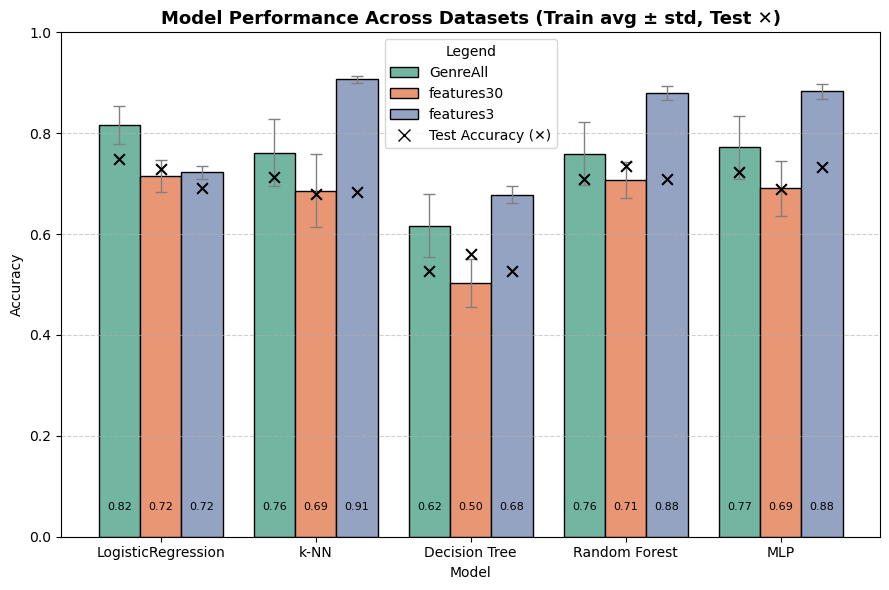

In [40]:
plt.figure(figsize=(9, 6))
sns.barplot(data=plot_df, x='Model', y='Train Avg Accuracy', hue='Dataset',
            palette='Set2', edgecolor='k', errorbar=None)

# Add manual error bars + test markers + improved labels
bar_width = 0.8 / len(datasets)  # width of each subgroup bar
x_positions = np.arange(len(models))

for i, model in enumerate(models):
    for j, dataset in enumerate(datasets):
        subset = plot_df[(plot_df['Model'] == model) & (plot_df['Dataset'] == dataset)]
        mean = subset['Train Avg Accuracy'].values[0]
        std = subset['Train Std'].values[0]
        test = subset['Test Accuracy'].values[0]

        # Calculate the x position for this bar
        x_pos = i - 0.4 + bar_width/2 + j * bar_width

        # Error bar
        plt.errorbar(
            x=x_pos, y=mean, yerr=std,
            fmt='none', ecolor='grey', capsize=4, elinewidth=1
        )

        # Test score marker (✕)
        plt.scatter(
            x_pos, test, color='black', marker='x', s=60, zorder=3, label=None
        )

        # Accuracy label (slightly above the error bar to avoid overlap)
        plt.text(
            x_pos, 0.05,  # 0.015 offset avoids overlap
            f'{mean:.2f}', ha='center', va='bottom', fontsize=8
        )




# Custom legend handle for test values
test_marker = plt.Line2D([0], [0], color='black', marker='x', linestyle='None', markersize=8, label='Test Accuracy (✕)')

# Title and style
plt.title('Model Performance Across Datasets (Train avg ± std, Test ✕)', fontsize=13, fontweight='bold')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Combine dataset legend + test marker
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles + [test_marker], labels + ['Test Accuracy (✕)'], title='Legend')

plt.tight_layout()
plt.show()

# Ensamble methods
Taking into account the results, we are gonna try to sum forces ensambling the three models that perform the best for the allGenre dataset and features30 dataset

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier


dataset = 'genreAll'
chosen_clf = [0, 1, 3] #LogisticRegression, KNN, RandomForest

clf1 = data[dataset]['models'][chosen_clf[0]]
clf2 = data[dataset]['models'][chosen_clf[1]]
clf3 = data[dataset]['models'][chosen_clf[2]]

X_train = data[dataset]['X_train']
y_train = data[dataset]['y_train']
X_test = data[dataset]['X_test']
y_test = data[dataset]['y_test']

eclf = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],
    voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression','kNN', 'Random Forest', 'Ensemble']):
    scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=10)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

eclf.fit(X_train, y_train)
y_pred = eclf.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f'\nEnsemble test accuracy: {accuracy:.2f}')    

Accuracy: 0.81 (+/- 0.04) [Logistic Regression]
Accuracy: 0.74 (+/- 0.05) [kNN]
Accuracy: 0.76 (+/- 0.03) [Random Forest]
Accuracy: 0.82 (+/- 0.03) [Ensemble]
Ensemble test accuracy: 0.79


# Further feature selection
Finally, and regarding the observed overfitting specially for the feature3 dataset, let's try to reduce the dimmensinality and get better results

In [ ]:
feat_3 = pd.read_csv("/home/ibroto/Documents/UPF_SMC/ML/Lab1/Lab1/features_3_sec.csv")
scaler = preprocessing.StandardScaler()
for col in feat_3.columns[1:]:
    if isinstance(feat_3[col][0], str): print(f'  Textual column : {col} (values: {feat_3[col].unique()})')
    else:
        feat_3[col] = scaler.fit_transform(feat_3[[col]])

feat_label_dict = {'blues':0, 'classical':1, 'country':2, 'disco':3, 'hiphop':4, 'jazz':5, 'metal':6, 'pop':7, 'reggae':8,'rock':9}
feat_3['label'] = feat_3['label'].replace(feat_label_dict)


featSelector = SelectKBest(f_classif, k=60)
reduced_feat3 = featSelector.fit_transform(feat_3[feat_3.columns[2:-1]],feat_3[feat_3.columns[-1]])
reduced_feat3 = np.concatenate((feat_3[feat_3.columns[0]].values.reshape(-1, 1),reduced_feat3, feat_3[feat_3.columns[-1]].values.reshape(-1, 1)), axis=1)

